Assaignment 01
WICKRAMA WMTB
190680P

Q1

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

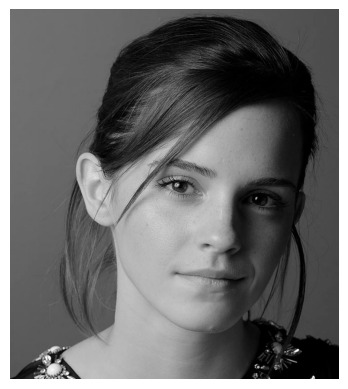

In [3]:
f=cv.imread(r'E:\assignment 1\emma_gray.jpg')
assert f is not None

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',f)
cv.waitKey(0)

implot=plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

original image

In [4]:
t1=np.linspace(0,50,50)
t2=np.linspace(50,100,1)
t3=np.linspace(100,255,100)
t4=np.linspace(255,150,1)
t5=np.linspace(150,255,104)

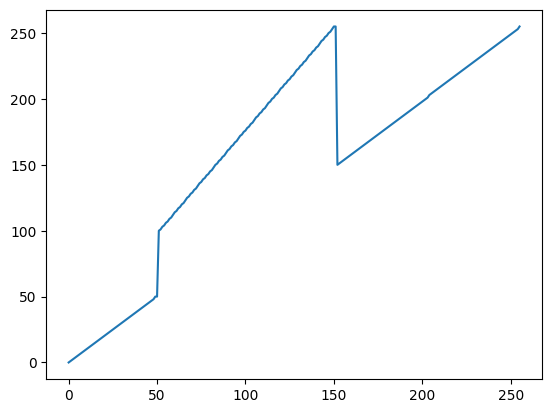

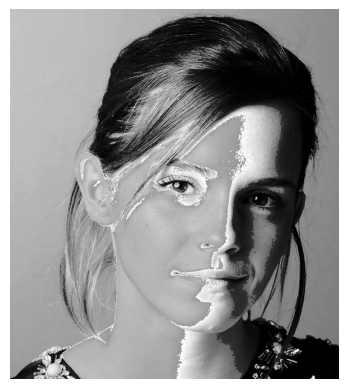

In [5]:
t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(t)
plt.show()
ax.set_aspect('equal')
assert len(t) == 256
g = cv.LUT(f,t)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',f)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

implot=plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

after intensitity transfomation

pixels of intensity range (50,150) have mapped to (100,250). so the intensity of that area has increased.

Q2

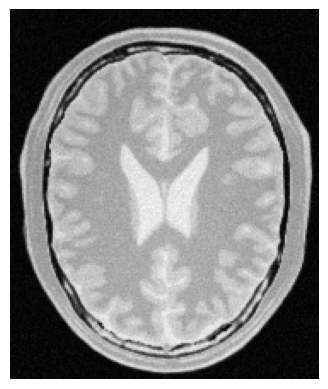

In [43]:
f=cv.imread(r'E:\assignment 1\brain_proton_density_slice.png')
assert f is not None

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',f)
cv.waitKey(0)

implot=plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

original image

In [44]:
t1=np.linspace(0,180,180)
t2=np.linspace(0,0,76)


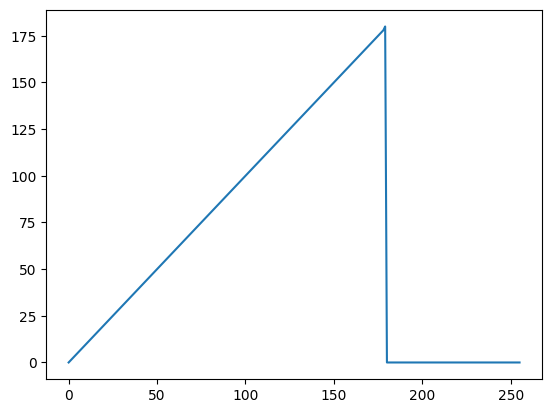

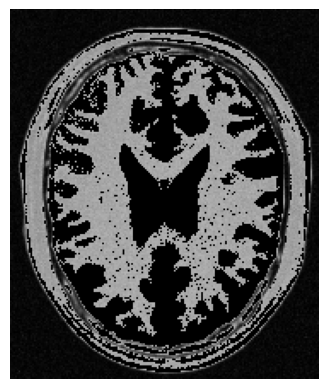

In [45]:
t=np.concatenate((t1,t2),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(t)
plt.show()
ax.set_aspect('equal')
assert len(t) == 256
g = cv.LUT(f,t)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',f)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

implot=plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

gray matter image

pixels which have intensity close to gray color are left. others are brought to black.

In [23]:
t1=np.linspace(0,0,190)
t2=np.linspace(190,255,66)

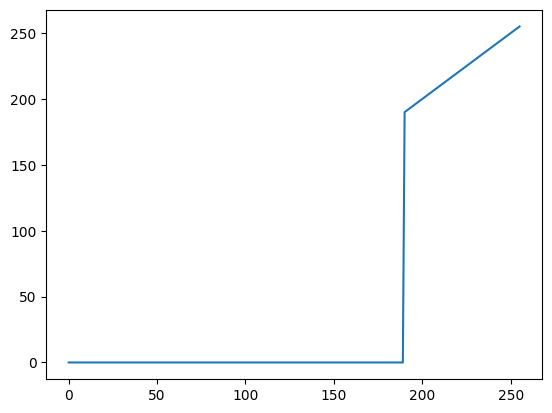

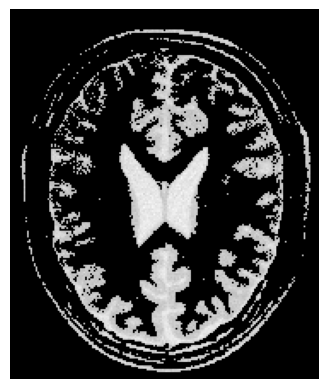

In [24]:
t=np.concatenate((t1,t2),axis=0).astype(np.uint8)
fig,ax=plt.subplots()
ax.plot(t)
plt.show()
ax.set_aspect('equal')
assert len(t) == 256
g = cv.LUT(f,t)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',f)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

implot=plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

white matter image

pixels which have intensity close to white color are left. others are brought to black.

Q3

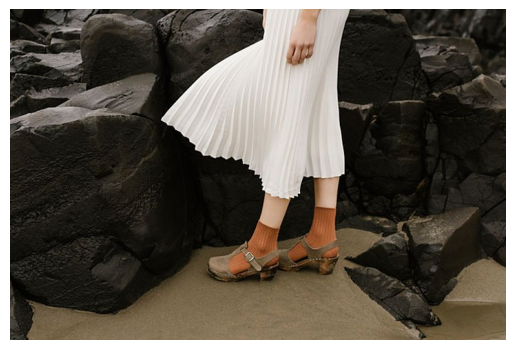

In [5]:
f=cv.imread(r'E:\assignment 1\highlights_and_shadows.jpg')
assert f is not None

implot=plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

original image

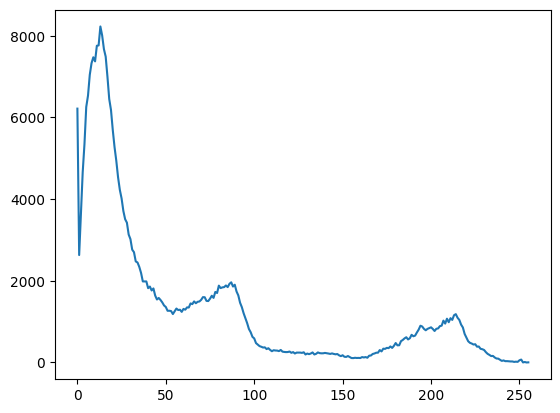

In [33]:
hist_f=cv.calcHist([f],[0],None,[256],[0,256])
fig,ax=plt.subplots()
ax.plot(hist_f)
plt.show()

histogram of original image

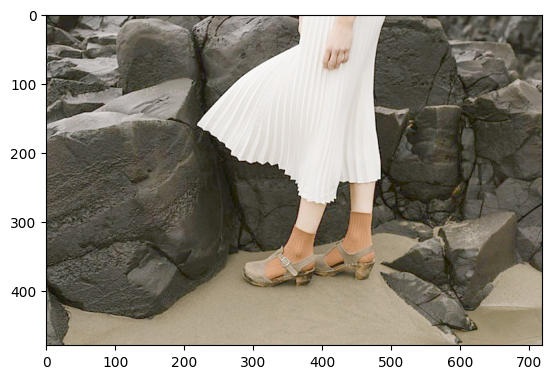

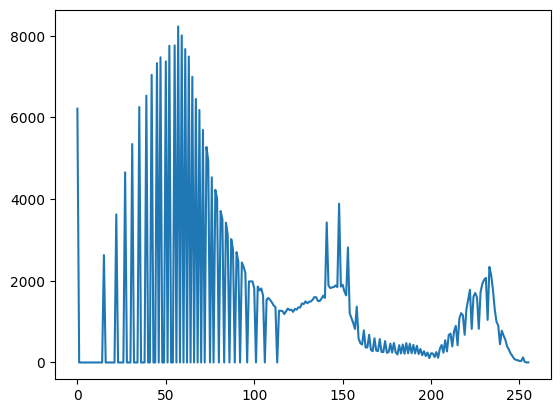

In [6]:
gamma=0.5
t=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
g=cv.LUT(f,t)
    
implot=plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
plt.show()

hist_g=cv.calcHist([g],[0],None,[256],[0,256])
fig,ax=plt.subplots()
ax.plot(hist_g)
plt.show()

gamma corrected image and its histogram

because of the gamma correction we can see the darker areas clearly than original image

Q4

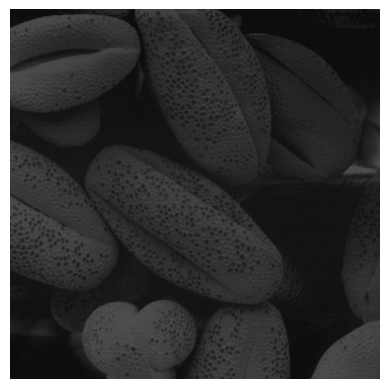

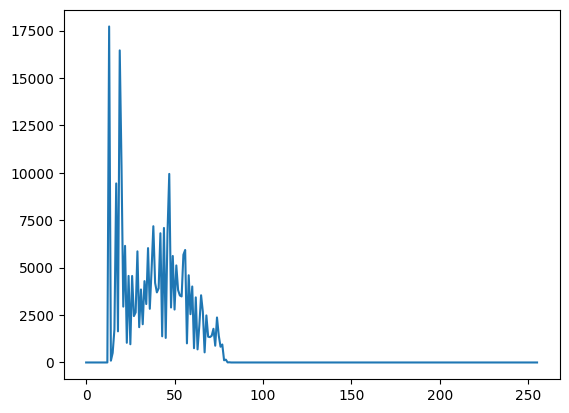

In [52]:
f=cv.imread(r'E:\assignment 1\shells.png',cv.IMREAD_GRAYSCALE)
assert f is not None

implot=plt.imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

hist_f=cv.calcHist([f],[0],None,[256],[0,256])
fig,ax=plt.subplots()
ax.plot(hist_f)
plt.show()

original image and its histogram

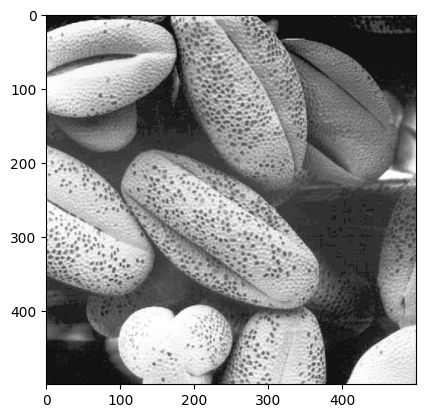

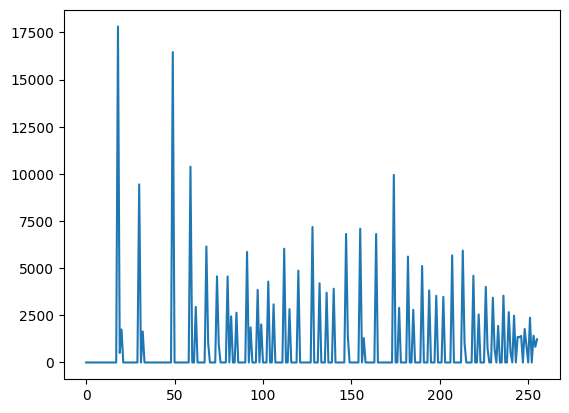

In [31]:
m,n=f.shape
temp=[np.sum(f==i) for i in range(0,256)]
t=np.array([round((255/(m*n))*sum(temp[0:i+1])) for i in range(0,256)]).astype(np.uint8)

g=cv.LUT(f,t)
    
implot=plt.imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB),cmap='gray')
plt.show()

hist_g=cv.calcHist([g],[0],None,[256],[0,256])
fig,ax=plt.subplots()
ax.plot(hist_g)
plt.show()

image and histogram  after equalization

in the original image probability of having white pixels is low but after equalization the probability of all the range have equalized. so the output image looks mor vibrant.

Q5 

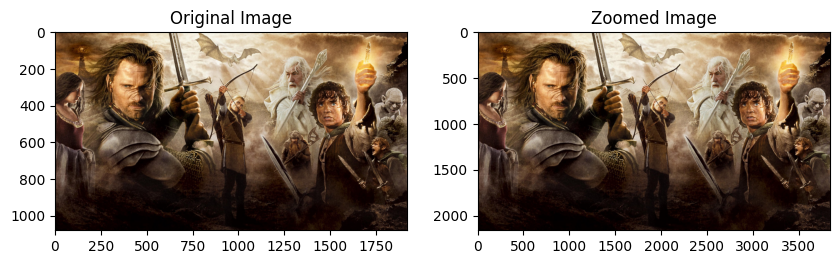

In [54]:
image = cv.imread(r'E:\assignment 1\a1q5images\im01.png')
assert image is not None
h = image.shape[0] ; w = image.shape[1]
scal_fac = 2
scaled_h = h * scal_fac ; scaled_w = w * scal_fac
zoomed = np.zeros((scaled_h,scaled_w,3), dtype=image.dtype)
for r in range(0,scaled_h):
    for c in range(0, scaled_w):
        if round(r/scal_fac) == h and round(c/scal_fac) == w:
            zoomed[r,c] = (image[round(r/scal_fac)-1, round(c/scal_fac)-1])
        elif round(r/scal_fac) == h:
            zoomed[r,c] = (image[round(r/scal_fac)-1, round(c/scal_fac)])
        elif round(c/scal_fac) == w:
            zoomed[r,c] = (image[round(r/scal_fac), round(c/scal_fac)-1])
        else:
            zoomed[r,c] = (image[round(r/scal_fac), round(c/scal_fac)])

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)) ; ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB)) ; ax[1].set_title("Zoomed Image")
plt.show()

height and and the width of the output image is twise as input image

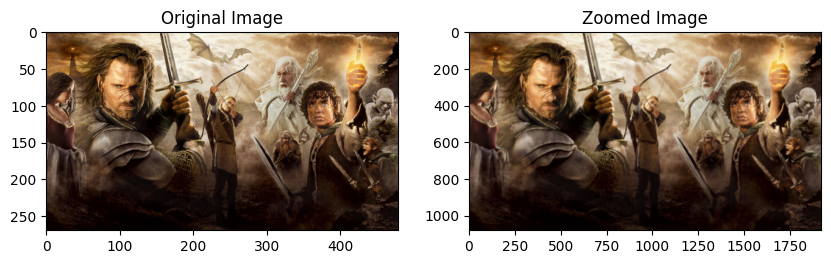

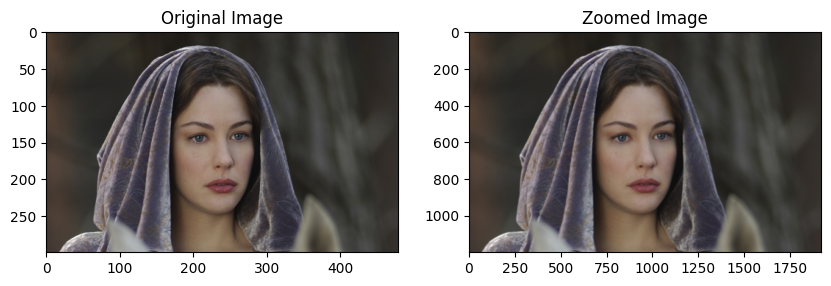

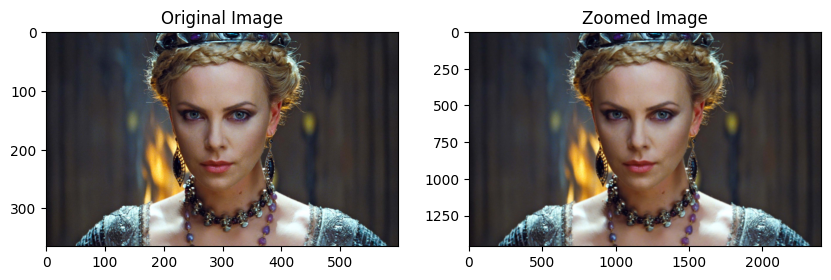

In [55]:
import os
path = 'E:/assignment 1/a1q5images/'
def bilinear_interpolation(image, image_title):
    h = image.shape[0] ; w = image.shape[1]
    scaled_h = h * scal_fac ; scaled_w = w * scal_fac
    zoomed = np.zeros((scaled_h,scaled_w,3), dtype=image.dtype)
    for i in range(0,scaled_h):
        for j in range(0, scaled_w):
            m = i/ scal_fac
            n = j/ scal_fac
            i1 = int(np.floor(m))
            i2 = int(np.ceil(m))
            j1 = int(np.floor(n))
            j2 = int(np.ceil(n))
            if i1 == h: i1 = h-1
            if i2 == h: i2 = h-1
            if j1 == w: j1 = w-1
            if j2 == w: j2 = w-1

            if i1 == i2 and j1 == j2:
                zoomed[i,j] = image[i1,j1]
            elif i1 == i2:
                left_side = image[i1,j1]
                right_side = image[i1,j2]
                zoomed[i,j] = np.round((n-j1)*right_side + (j2-n)*left_side).astype(int)
            elif j1 == j2:
                upper_side = image[i1,j1]
                bottom_side = image[i2,j1]
                zoomed[i,j] = np.round((m-i1)*bottom_side + (i2-m)*upper_side).astype(int)
            else:
                left_side = (m-i1)*image[i2,j1] + (i2-m)*image[i1,j1]
                right_side = (m-i1)*image[i2,j2] + (i2-m)*image[i1,j2]
                zoomed[i,j] = np.round((n-j1)*right_side + (j2-n)*left_side).astype(int)
    fig, ax = plt.subplots(1,2, figsize=(10,10))
    ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))
    ax[1].set_title("Zoomed Image")
    plt.show()
    cv.imwrite(os.path.join(path, image_title), zoomed )
path = 'E:/assignment 1/a1q5images/'
images = ["im01small.png", "im02small.png", "im03small.png"]
scal_fac = 4
for i in range(3):
    image = cv.imread('E:/assignment 1/a1q5images/'+images[i])
    assert image is not None
    save_as = images[i][0:4]+" zoomed_by_%s.png"%(scal_fac)
    bilinear_interpolation(image, save_as)

accuaraccy is high when we use bilinear interpolation

In [69]:
def SSD(f , second_image):
    f_sqr = np.square(f)
    second_image_sqr = np.square(second_image)
    normalized_squared_differences = (f_sqr - second_image_sqr)/(f.size)
    print(np.sum(normalized_squared_differences))
for i in range(1,4):
    f = cv.imread("E:/assignment 1/a1q5images/im0%s.png"%i).astype(np.float32)
    second_image = cv.imread("E:/assignment 1/a1q5images/im0%s zoomed_by_4.png"%i).astype(np.float32)
    if i==3: f = np.resize(f,(1460,2400,3)) 
    print("SSD for image 0%s: "%i, end= ''); SSD(f, second_image)

SSD for image 01: 220.2565134709362
SSD for image 02: 3.183057581018519
SSD for image 03: 63.54420700152209


Q6 (a)

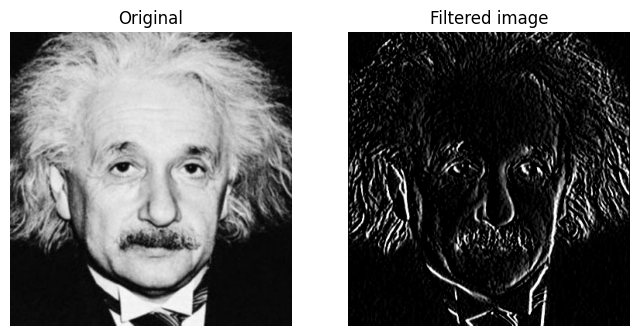

In [56]:
f = cv.imread(r"E:\assignment 1\einstein.png", cv.IMREAD_GRAYSCALE) 
sobel_filter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype = np.float32) 
g = cv.filter2D(f, -1, sobel_filter) 

fig,ax = plt.subplots(1,2, figsize = (8,8)) 
ax[0].imshow(f, cmap = 'gray')
ax[0].set_title("Original") ; ax[0].axis('off')
ax[1].imshow(g, cmap = 'gray')
ax[1].set_title("Filtered image") ; ax[1].axis('off')
plt.show()

edges of the image can be seen in white color in the filtered image

Q6 (b)

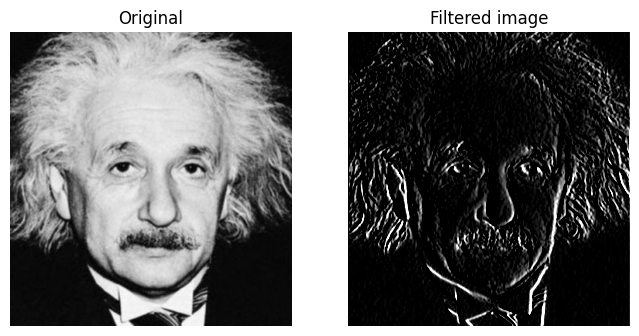

In [57]:
f = cv.imread(r"E:\assignment 1\einstein.png", cv.IMREAD_GRAYSCALE)
kernal = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
kernal_size = kernal.shape[0]
num_rows = f.shape[0]
num_columns = f.shape[1]
padding_row= np.zeros((kernal_size//2,num_columns))
padding_column = np.zeros(( 2* int(np.floor(kernal_size/2)) + num_rows, kernal_size//2))
temp = np.concatenate((padding_row,f,padding_row),axis=0)
padded_matrix = np.concatenate((padding_column,temp,padding_column),axis=1)
filtered = np.zeros(f.shape)

for j in range(0,padded_matrix.shape[0]-kernal_size//2- 1):
    temp2 = padded_matrix[j:j+kernal_size,:]
    array_ = np.zeros((1, num_columns))

    for i in range(0, padded_matrix.shape[1]-kernal_size+1 ):
        temp3 = padded_matrix[j :j +kernal_size,i:kernal_size+i]
        array_[0,i] = np.sum(np.multiply(temp3, kernal))
    filtered[j] = array_

fig,ax = plt.subplots(1,2, figsize = (8,8)) 
ax[0].imshow(f, cmap = 'gray')
ax[0].set_title("Original") ; ax[0].axis('off')
ax[1].imshow(filtered, cmap = 'gray', vmin=0, vmax=255)
ax[1].set_title("Filtered image") ; ax[1].axis('off')
plt.show()

the result is similar to the previous when we using filter2D

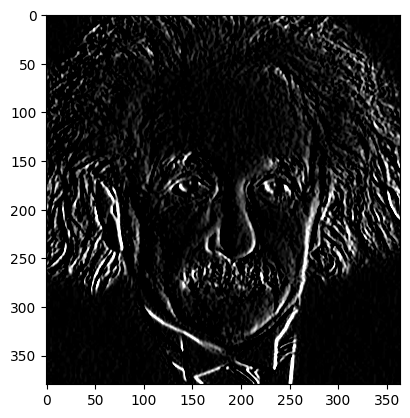

In [58]:
f = cv.imread(r"E:\assignment 1\einstein.png", cv.IMREAD_GRAYSCALE)
num_rows = f.shape[0]
num_cols = f.shape[1]

kernal1 = np.array([[1],[2],[1]])
temp1 = np.zeros((1,num_cols)).astype(np.uint8)
padded_matrix1 = np.concatenate((temp1,f,temp1), axis = 0)
after_kernal1 = np.zeros(f.shape).astype(np.float32)

for i in range(1,num_rows+1):
    for j in range(0, num_cols):
        temp2 = np.array([[padded_matrix1[i-1][j]],[padded_matrix1[i][j]],[padded_matrix1[i+1][j]]])
        after_kernal1[i-1][j] = np.sum(np.multiply(temp2,kernal1))
kernal2 = np.array([1,0,-1])
temp3 = np.zeros((num_rows,1)).astype(np.float32)
padded_matrix2 = np.concatenate((temp3,after_kernal1,temp3), axis = 1)
after_kernal2 = np.zeros(after_kernal1.shape).astype(np.float32)

for i in range(0,num_rows):
    for j in range(1, num_cols+1):
        temp4 = np.array([padded_matrix2[i][j-1],padded_matrix2[i][j],padded_matrix2[i][j+1]])
        after_kernal2[i][j-1] = np.sum(np.multiply(temp4,kernal2))
plt.imshow(after_kernal2, cmap = 'gray', vmin=0, vmax=255)
plt.show()

the same result can be seen

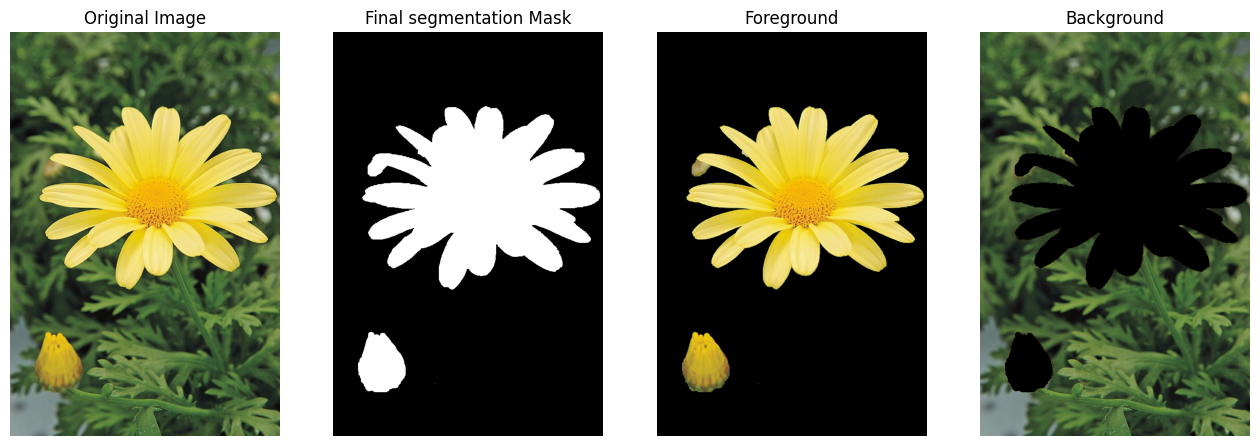

In [66]:
f = cv.imread(r"E:\assignment 1\daisy.jpg")
mask = np.zeros(f.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (25,150,535,600)

cv.grabCut(f,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fg = f*mask2[:,:,np.newaxis]

mask3 = np.zeros(f.shape[:2],np.uint8)
mask3 = np.where(mask2==1,0,1).astype('uint8')
bg = f*mask3[:,:,np.newaxis]

fg = cv.cvtColor(fg, cv.COLOR_BGR2RGB)
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
bg = cv.cvtColor(bg, cv.COLOR_BGR2RGB)

fig , ax = plt.subplots(1,4, figsize = (16,16))
ax[0].imshow(f); ax[0].set_title("Original Image"); ax[0].axis('off');
ax[1].imshow(mask2, cmap = 'gray'); ax[1].set_title("Final segmentation Mask"); ax[1].axis('off');
ax[2].imshow(fg); ax[2].set_title("Foreground"); ax[2].axis('off');
ax[3].imshow(bg); ax[3].set_title("Background"); ax[3].axis('off');
plt.show()

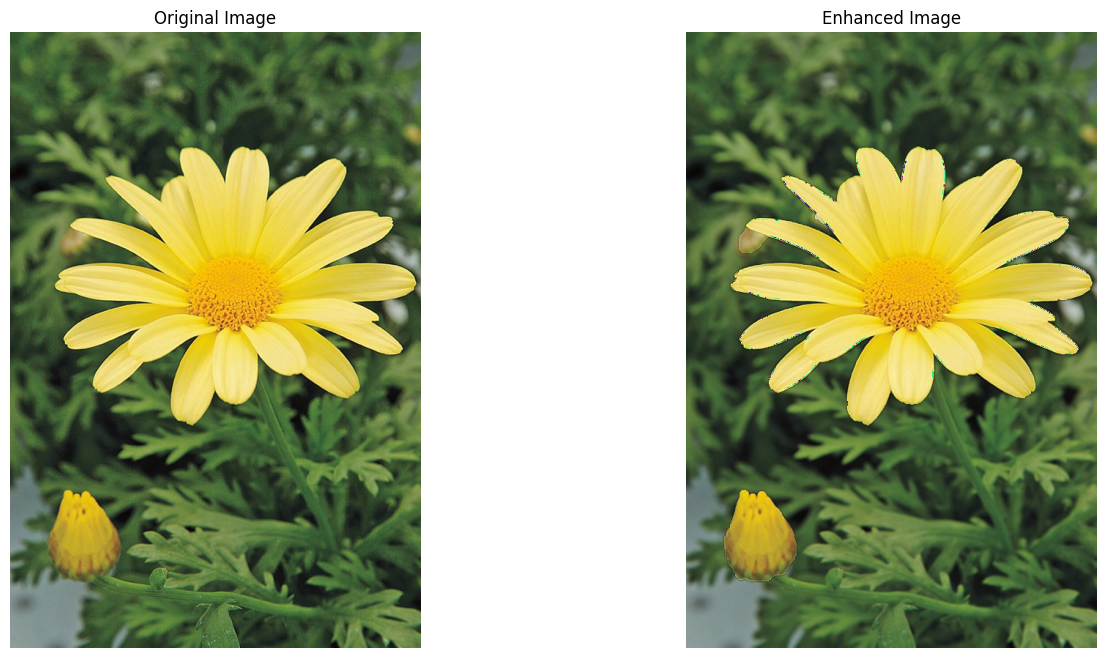

In [68]:
fig , ax = plt.subplots(1,2, figsize = (16,8))
blurred_bg = cv.GaussianBlur(bg,(5,5),0)
enhanced = blurred_bg + fg
ax[0].imshow(f); ax[0].set_title("Original Image"); ax[0].axis('off');
ax[1].imshow(enhanced); ax[1].set_title("Enhanced Image"); ax[1].axis('off');
plt.show()

(c) in the enhanced image the background image is blurred and added to the foreground image. when the background is blured black colour areas get sheded. becase of that we can see quite dark beyond the edges